In [3]:
!pip install --user graphviz

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [5]:
!python -m pip install --upgrade pip

  Found existing installation: pip 19.2.3
    Uninstalling pip-19.2.3:
      Successfully uninstalled pip-19.2.3


# Lab 12 - Decision Trees

For this lab, we will use survey data collected by the city of [Somerville, MA](https://en.wikipedia.org/wiki/Somerville,_Massachusetts) asking residents about their happiness, as well as ratings of city services. 

The data is available from the UC Irvine Machine Learning Repository: [https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey](https://archive.ics.uci.edu/ml/datasets/Somerville+Happiness+Survey)

The link to download the data is [https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv)

The data columns are:

- D = decision attribute (D) with values 0 (unhappy) and 1 (happy) 
- X1 = the availability of information about the city services 
- X2 = the cost of housing 
- X3 = the overall quality of public schools 
- X4 = your trust in the local police 
- X5 = the maintenance of streets and sidewalks 
- X6 = the availability of social community events 

Attributes X1 to X6 have values 1 to 5.

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import tree
from sklearn.metrics import confusion_matrix
import graphviz
from graphviz import Source
 
from sklearn.tree import export_graphviz
import sklearn.metrics as met


%matplotlib inline

Read the data into a dataframe.  We have given the columns more descriptive names.

In [9]:
new_column_names = ["happy","city_info","housing_cost", "school_quality", \
                    "trust_police", "streets_sidewalks", "community_events"]
city = pd.read_csv("somerville.csv", \
                    encoding = "utf-16le",names = new_column_names, \
                    header = 0)
city.head()

,happy,city_info,housing_cost,school_quality,trust_police,streets_sidewalks,community_events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


## Classwork

The code belows allows you to make your own decision tree.  What three conditions should you use to get the highest accuracy?

In [10]:
# top level of decision tree
filter_level_1 = city["school_quality"] < 4
level_2_left = city[filter_level_1]
level_2_right = city[~filter_level_1]

In [11]:
# second level of decision tree on left
filter_level_2_left = level_2_left["housing_cost"] < 4
level_3_left_left = level_2_left[filter_level_2_left]
level_3_left_right = level_2_left[~filter_level_2_left]

In [12]:
# second level of decision tree on right
filter_level_2_right = level_2_right["community_events"] < 4
level_3_right_left = level_2_right[filter_level_2_right]
level_3_right_right = level_2_right[~filter_level_2_right]

In [18]:
# make predictions

proportion_1 = level_3_left_left["happy"].sum()/level_3_left_left.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_left_left = confusion_matrix(level_3_left_left["happy"],np.ones(level_3_left_left.shape[0]))
else:
    confusion_matrix_left_left = confusion_matrix(level_3_left_left["happy"],np.zeros(level_3_left_left.shape[0]))

proportion_1 = level_3_left_right["happy"].sum()/level_3_left_right.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_left_right = confusion_matrix(level_3_left_right["happy"],np.ones(level_3_left_right.shape[0]))
else:
    confusion_matrix_left_right = confusion_matrix(level_3_left_right["happy"],np.zeros(level_3_left_right.shape[0]))

proportion_1 = level_3_right_left["happy"].sum()/level_3_right_left.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_right_left = confusion_matrix(level_3_right_left["happy"],np.ones(level_3_right_left.shape[0]))
else:
    confusion_matrix_right_left = confusion_matrix(level_3_right_left["happy"],np.zeros(level_3_right_left.shape[0]))


proportion_1 = level_3_right_right["happy"].sum()/level_3_right_right.shape[0]
if (proportion_1 >= 0.5):
    confusion_matrix_right_right = confusion_matrix(level_3_right_right["happy"],np.ones(level_3_right_right.shape[0]))
else:
    confusion_matrix_right_right = confusion_matrix(level_3_right_right["happy"],np.zeros(level_3_right_right.shape[0]))

cm = confusion_matrix_left_left + confusion_matrix_left_right + confusion_matrix_right_left + \
                            confusion_matrix_right_right

tn, fp, fn, tp = cm.ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)

Sensitivity: 0.4675324675324675
Specificity: 0.7424242424242424
Precision: 0.6792452830188679
Accuracy: 0.5944055944055944


## Fitting a decision tree with sci-kit learn

We can get just the independent variables (x's) using the following:

In [19]:
city.iloc[:,1:7]

,city_info,housing_cost,school_quality,trust_police,streets_sidewalks,community_events
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5
5,5,5,3,5,5,5
6,3,1,2,2,1,3
7,5,4,4,4,4,5
8,4,1,4,4,4,4
9,4,4,4,2,5,5


Next we created the decision tree classifier variable (object) and then fit it to our data:

In [37]:
clf = tree.DecisionTreeClassifier(max_depth = 2)
clf = clf.fit(city.iloc[:,1:7], city["happy"])

If you are running Jupyter Hub on your own computer, you may be able to display the decision tree by:

[Text(167.4, 181.2, 'X[0] <= 4.5\nentropy = 0.497\nsamples = 143\nvalue = [66, 77]'),
 Text(83.7, 108.72, 'X[5] <= 3.5\nentropy = 0.471\nsamples = 71\nvalue = [44, 27]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.198\nsamples = 18\nvalue = [16, 2]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.498\nsamples = 53\nvalue = [28, 25]'),
 Text(251.10000000000002, 108.72, 'X[4] <= 3.5\nentropy = 0.424\nsamples = 72\nvalue = [22, 50]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.484\nsamples = 17\nvalue = [10, 7]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.341\nsamples = 55\nvalue = [12, 43]')]

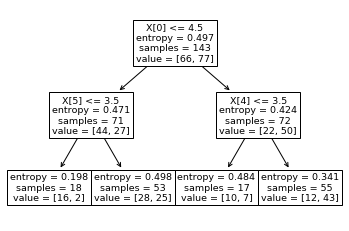

In [41]:
tree.plot_tree(clf)

If you are using the Jupyter Hub server, run the following code (which will give an error):

In [22]:
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("happiness.dot")


ExecutableNotFound: failed to execute ['dot', '-Tpdf', '-O', 'happiness.dot'], make sure the Graphviz executables are on your systems' PATH

However, despite the error, there should now be a file called happiness.dot in your directory.  To view the fitted decision tree, open the happiness.dot file in Jupyter and copy the text.  Paste this text into the text box at [http://www.webgraphviz.com](http://www.webgraphviz.com) and click the "Generate graph!" button at the bottom.

The column names have been replaced by `X[0], X[1], ..., X[5]`.  Run the following code to change `X[0], X[1], ..., X[5]` to the column names in happiness.dot.

In [ ]:
with open ("happiness.dot", "r") as fin:
    with open("happiness_fixed.dot","w") as fout:
        for line in fin.readlines():
            line = line.replace("X[0]","city_info")
            line = line.replace("X[1]","housing_cost")
            line = line.replace("X[2]","school_quality")
            line = line.replace("X[3]","trust_police")
            line = line.replace("X[4]","streets_sidewalks")
            line = line.replace("X[5]","community_events")
            fout.write(line)

Copy the contents of happiness.dot into the textbox in [http://www.webgraphviz.com](http://www.webgraphviz.com) to display the decision tree with the column names.  How does it compare the the decision tree you made?

To make predictions, we can use the following code:

In [38]:
predictions = clf.predict(city.iloc[:,1:7])
predictions

array([0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1], dtype=int64)

We compute the confusion matrix:

In [39]:
met.confusion_matrix(city["happy"], predictions)


array([[54, 12],
       [34, 43]], dtype=int64)

To get the true negatives, false positives, false negatives, and true positives:

In [40]:
tn, fp, fn, tp = met.confusion_matrix(city["happy"], predictions).ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)

Sensitivity: 0.5584415584415584
Specificity: 0.8181818181818182
Precision: 0.7818181818181819
Accuracy: 0.6783216783216783
